In [1]:
import matplotlib.pyplot as plt
import photutils
import pandas as pd
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import glob
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.aperture import SkyCircularAperture
import numpy as np
from astroquery.jplhorizons import Horizons
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level fram
from photutils.aperture import aperture_photometry
import warnings
warnings.filterwarnings("ignore")

In [2]:
fpath = '/Users/Thomas/OneDrive/Desktop/2022-09-01/'
mist = glob.glob(fpath+'Data2/New_FITS_Headers/'+'*.fits')    #List of files

In [3]:
biasimages = glob.glob(fpath+'bias/*bias.fit')          #Gets the correction from Mitchell's code
flatimages = glob.glob(fpath+'flat/*flat.fit')
biaslists = []
flatlists = []
for i in biasimages:
    biaslists.append(fits.open(i))
for i in flatimages:
    flatlists.append(fits.open(i))

biasaverage = np.zeros((512, 2048))
for k in biaslists:
    biasaverage += k[0].data
biasaverage = biasaverage / len(biaslists)

flataverage = np.zeros((512, 2048))
for k in flatlists:
    flataverage += k[0].data
flataverage = flataverage / len(flatlists)

flatcorrect = np.zeros((512, 2048))
for j in flatlists:
    flatcorrect += (j[0].data - biasaverage)
flatcorrect = flatcorrect / flataverage

In [7]:
def testing_star(RA_DEC):
    Flux = []
    Flux_ref = []
    Flux_cor = []
    Times = []
 

    for i in mist:

        hdul = fits.open(i)
        hdu = hdul[0]
        data = hdu.data
        wcs = WCS(hdu.header)
    

        Times.append(hdul[0].header['JD']) 
        obj = Horizons(id='1941 SJ', location='H81', epochs=hdul[0].header['JD'])
        RA = obj.ephemerides()['RA'][0]
        DEC = obj.ephemerides()['DEC'][0]
        positions = SkyCoord(RA, DEC, frame='icrs', unit = 'deg')
        aperture = SkyCircularAperture(positions, r=4.8 * u.arcsec) 
    
        
        
        c1 = SkyCoord(RA_DEC, unit=(u.hourangle, u.deg))   #Getting refrence star
        RA_ref = c1.ra.degree
        DEC_ref = c1.dec.degree
        ref_stars = SkyCoord(RA_ref, DEC_ref, frame='icrs', unit = 'deg') 
        aperture_ref = SkyCircularAperture(ref_stars, r=6 * u.arcsec)  

    
    
        phot_table = aperture_photometry(data/flatcorrect, aperture, wcs=wcs)  
        phot_table_ref = aperture_photometry(data/flatcorrect, aperture_ref, wcs=wcs)

    
        Flux.append(phot_table['aperture_sum'].value)
        Flux_ref.append(phot_table_ref['aperture_sum'].value)
        Flux_cor.append(phot_table['aperture_sum'].value/phot_table_ref['aperture_sum'].value)
    
    plt.plot(Times, Flux_cor)
#     plt.scatter(Times, Flux_cor)             #Plotting against time here (shows the gap in data)
    
    

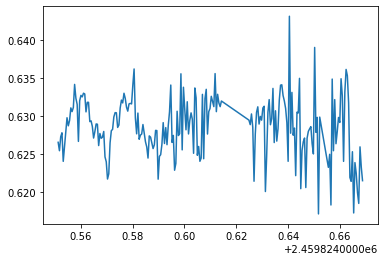

In [8]:
testing_star('20:57:52.2052 -00:41:52.438')

In [ ]:
testing_star('20:57:51.573 -00:41:51.656')

In [ ]:
testing_star('20:57:22.7862 -00:40:50.955')

In [ ]:
testing_star('20:57:39.4032 -00:41:54.971')